In [4]:
#Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
# for plots to appear in the notebook
%matplotlib inline 

# Pipeline
from sklearn.pipeline import make_pipeline

# preprocessing
from sklearn.preprocessing import StandardScaler

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score
## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [23]:
df = pd.read_csv("heart.csv") 
df.shape # (rows, columns)

(303, 14)

In [24]:
#Lets look at the data structure, rows and columns
print("(Rows, columns): " + str(df.shape))
df.columns

(Rows, columns): (303, 14)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [26]:
#Lets check the number of unique values for each variable.
df.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
#Lets nemame the columns to a more descriptive names
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'Disease']

In [55]:
df.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg_type  max_heart_rate_achieved  \
0                    1              0                      150   
1                    0              1                      187   
2                    0              0                      172   
3                    0              1                      178   
4                    0              1                      163   

   exercise_induced_angina  st_depression  st_slope_type  num_major_vessels  \
0                        0            2.3              0                  0   
1                        0            3.5              0                  0   
2                        0            1.4              2                  0   
3                        0            0.8              2                  0   
4                        1            0.6              2                  0   

   thalassemia_type  Disease  
0                 1        1  
1                 2        1  
2                 2        1  
3                 2        1  
4                 2        1

In [54]:
#Lets use head() method and transpose the output with .T to view the data 
df.head().T

0      1      2      3      4
age                       63.0   37.0   41.0   56.0   57.0
sex                        1.0    1.0    0.0    1.0    0.0
chest_pain_type            3.0    2.0    1.0    1.0    0.0
resting_blood_pressure   145.0  130.0  130.0  120.0  120.0
cholesterol              233.0  250.0  204.0  236.0  354.0
fasting_blood_sugar        1.0    0.0    0.0    0.0    0.0
rest_ecg_type              0.0    1.0    0.0    1.0    1.0
max_heart_rate_achieved  150.0  187.0  172.0  178.0  163.0
exercise_induced_angina    0.0    0.0    0.0    0.0    1.0
st_depression              2.3    3.5    1.4    0.8    0.6
st_slope_type              0.0    0.0    2.0    2.0    2.0
num_major_vessels          0.0    0.0    0.0    0.0    0.0
thalassemia_type           1.0    2.0    2.0    2.0    2.0
Disease                    1.0    1.0    1.0    1.0    1.0

In [31]:
df.describe()

age         sex  chest_pain_type  resting_blood_pressure  \
count  303.000000  303.000000       303.000000              303.000000   
mean    54.366337    0.683168         0.966997              131.623762   
std      9.082101    0.466011         1.032052               17.538143   
min     29.000000    0.000000         0.000000               94.000000   
25%     47.500000    0.000000         0.000000              120.000000   
50%     55.000000    1.000000         1.000000              130.000000   
75%     61.000000    1.000000         2.000000              140.000000   
max     77.000000    1.000000         3.000000              200.000000   

       cholesterol  fasting_blood_sugar  rest_ecg_type  \
count   303.000000           303.000000     303.000000   
mean    246.264026             0.148515       0.528053   
std      51.830751             0.356198       0.525860   
min     126.000000             0.000000       0.000000   
25%     211.000000             0.000000       0.000000   
50%     240.000000             0.000000       1.000000   
75%     274.500000             0.000000       1.000000   
max     564.000000             1.000000       2.000000   

       max_heart_rate_achieved  exercise_induced_angina  st_depression  \
count               303.000000               303.000000     303.000000   
mean                149.646865                 0.326733       1.039604   
std                  22.905161                 0.469794       1.161075   
min                  71.000000                 0.000000       0.000000   
25%                 133.500000                 0.000000       0.000000   
50%                 153.000000                 0.000000       0.800000   
75%                 166.000000                 1.000000       1.600000   
max                 202.000000                 1.000000       6.200000   

       st_slope_type  num_major_vessels  thalassemia_type     Disease  
count     303.000000         303.000000        303.000000  303.000000  
mean        1.399340           0.729373          2.313531    0.544554  
std         0.616226           1.022606          0.612277    0.498835  
min         0.000000           0.000000          0.000000    0.000000  
25%         1.000000           0.000000          2.000000    0.000000  
50%         1.000000           0.000000          2.000000    1.000000  
75%         2.000000           1.000000          3.000000    1.000000  
max         2.000000           4.000000          3.000000    1.000000

In [97]:
# Filtering data by Positive Heart Disease patient
positive = df[df['Disease']==1]
positive.describe().T

count        mean        std    min    25%    50%  \
age                      165.0   52.496970   9.550651   29.0   44.0   52.0   
sex                      165.0    0.563636   0.497444    0.0    0.0    1.0   
chest_pain_type          165.0    1.375758   0.952222    0.0    1.0    2.0   
resting_blood_pressure   165.0  129.303030  16.169613   94.0  120.0  130.0   
cholesterol              165.0  242.230303  53.552872  126.0  208.0  234.0   
fasting_blood_sugar      165.0    0.139394   0.347412    0.0    0.0    0.0   
rest_ecg_type            165.0    0.593939   0.504818    0.0    0.0    1.0   
max_heart_rate_achieved  165.0  158.466667  19.174276   96.0  149.0  161.0   
exercise_induced_angina  165.0    0.139394   0.347412    0.0    0.0    0.0   
st_depression            165.0    0.583030   0.780683    0.0    0.0    0.2   
st_slope_type            165.0    1.593939   0.593635    0.0    1.0    2.0   
num_major_vessels        165.0    0.363636   0.848894    0.0    0.0    0.0   
thalassemia_type         165.0    2.121212   0.465752    0.0    2.0    2.0   
Disease                  165.0    1.000000   0.000000    1.0    1.0    1.0   

                           75%    max  
age                       59.0   76.0  
sex                        1.0    1.0  
chest_pain_type            2.0    3.0  
resting_blood_pressure   140.0  180.0  
cholesterol              267.0  564.0  
fasting_blood_sugar        0.0    1.0  
rest_ecg_type              1.0    2.0  
max_heart_rate_achieved  172.0  202.0  
exercise_induced_angina    0.0    1.0  
st_depression              1.0    4.2  
st_slope_type              2.0    2.0  
num_major_vessels          0.0    4.0  
thalassemia_type           2.0    3.0  
Disease                    1.0    1.0

In [98]:
# Filtering data by Positive Heart Disease patient
Negative= df[df['Disease']==0]
Negative.describe().T

count        mean        std    min     25%    50%  \
age                      138.0   56.601449   7.962082   35.0   52.00   58.0   
sex                      138.0    0.826087   0.380416    0.0    1.00    1.0   
chest_pain_type          138.0    0.478261   0.905920    0.0    0.00    0.0   
resting_blood_pressure   138.0  134.398551  18.729944  100.0  120.00  130.0   
cholesterol              138.0  251.086957  49.454614  131.0  217.25  249.0   
fasting_blood_sugar      138.0    0.159420   0.367401    0.0    0.00    0.0   
rest_ecg_type            138.0    0.449275   0.541321    0.0    0.00    0.0   
max_heart_rate_achieved  138.0  139.101449  22.598782   71.0  125.00  142.0   
exercise_induced_angina  138.0    0.550725   0.499232    0.0    0.00    1.0   
st_depression            138.0    1.585507   1.300340    0.0    0.60    1.4   
st_slope_type            138.0    1.166667   0.561324    0.0    1.00    1.0   
num_major_vessels        138.0    1.166667   1.043460    0.0    0.00    1.0   
thalassemia_type         138.0    2.543478   0.684762    0.0    2.00    3.0   
Disease                  138.0    0.000000   0.000000    0.0    0.00    0.0   

                            75%    max  
age                       62.00   77.0  
sex                        1.00    1.0  
chest_pain_type            0.00    3.0  
resting_blood_pressure   144.75  200.0  
cholesterol              283.00  409.0  
fasting_blood_sugar        0.00    1.0  
rest_ecg_type              1.00    2.0  
max_heart_rate_achieved  156.00  195.0  
exercise_induced_angina    1.00    1.0  
st_depression              2.50    6.2  
st_slope_type              1.75    2.0  
num_major_vessels          2.00    4.0  
thalassemia_type           3.00    3.0  
Disease                    0.00    0.0

Looks like younger people are prone to heart disease than older people. Interesting observation.

In [101]:
# Filtering data by male
Female= df[df['sex']==0]
Female.describe().T

count        mean        std    min     25%    50%  \
age                       96.0   55.677083   9.409396   34.0   49.75   57.0   
sex                       96.0    0.000000   0.000000    0.0    0.00    0.0   
chest_pain_type           96.0    1.041667   0.972427    0.0    0.00    1.0   
resting_blood_pressure    96.0  133.083333  19.311119   94.0  120.00  131.0   
cholesterol               96.0  261.302083  65.088946  141.0  214.75  253.0   
fasting_blood_sugar       96.0    0.125000   0.332455    0.0    0.00    0.0   
rest_ecg_type             96.0    0.572917   0.557150    0.0    0.00    1.0   
max_heart_rate_achieved   96.0  151.125000  20.047969   96.0  141.25  157.0   
exercise_induced_angina   96.0    0.229167   0.422503    0.0    0.00    0.0   
st_depression             96.0    0.876042   1.119844    0.0    0.00    0.6   
st_slope_type             96.0    1.427083   0.593736    0.0    1.00    1.0   
num_major_vessels         96.0    0.552083   0.881026    0.0    0.00    0.0   
thalassemia_type          96.0    2.125000   0.441290    0.0    2.00    2.0   
Disease                   96.0    0.750000   0.435286    0.0    0.75    1.0   

                            75%    max  
age                       63.00   76.0  
sex                        0.00    0.0  
chest_pain_type            2.00    3.0  
resting_blood_pressure   140.00  200.0  
cholesterol              296.75  564.0  
fasting_blood_sugar        0.00    1.0  
rest_ecg_type              1.00    2.0  
max_heart_rate_achieved  165.00  192.0  
exercise_induced_angina    0.00    1.0  
st_depression              1.40    6.2  
st_slope_type              2.00    2.0  
num_major_vessels          1.00    3.0  
thalassemia_type           2.00    3.0  
Disease                    1.00    1.0

In [106]:
# Filtering data by male
Male= df[df['sex']==1]
Male.describe().T

count        mean        std    min    25%    50%  \
age                      207.0   53.758454   8.883803   29.0   47.0   54.0   
sex                      207.0    1.000000   0.000000    1.0    1.0    1.0   
chest_pain_type          207.0    0.932367   1.059064    0.0    0.0    0.0   
resting_blood_pressure   207.0  130.946860  16.658246   94.0  120.0  130.0   
cholesterol              207.0  239.289855  42.782392  126.0  208.0  235.0   
fasting_blood_sugar      207.0    0.159420   0.366955    0.0    0.0    0.0   
rest_ecg_type            207.0    0.507246   0.510754    0.0    0.0    1.0   
max_heart_rate_achieved  207.0  148.961353  24.130882   71.0  132.0  151.0   
exercise_induced_angina  207.0    0.371981   0.484505    0.0    0.0    0.0   
st_depression            207.0    1.115459   1.174632    0.0    0.0    0.8   
st_slope_type            207.0    1.386473   0.627378    0.0    1.0    1.0   
num_major_vessels        207.0    0.811594   1.074082    0.0    0.0    0.0   
thalassemia_type         207.0    2.400966   0.659949    0.0    2.0    2.0   
Disease                  207.0    0.449275   0.498626    0.0    0.0    0.0   

                           75%    max  
age                       59.5   77.0  
sex                        1.0    1.0  
chest_pain_type            2.0    3.0  
resting_blood_pressure   140.0  192.0  
cholesterol              268.0  353.0  
fasting_blood_sugar        0.0    1.0  
rest_ecg_type              1.0    2.0  
max_heart_rate_achieved  168.0  202.0  
exercise_induced_angina    1.0    1.0  
st_depression              1.8    5.6  
st_slope_type              2.0    2.0  
num_major_vessels          1.0    4.0  
thalassemia_type           3.0    3.0  
Disease                    1.0    1.0

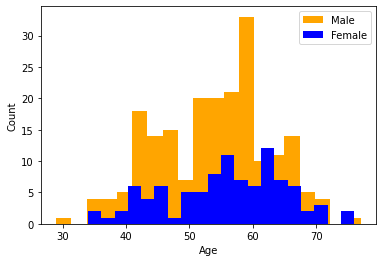

In [120]:
#Lets plot a histogram of age distribution of the sex groups and overlay them 
plt.hist(Male['age'], color='orange', bins=20, label='Male')
plt.hist(Female['age'], color='blue', bins=20, label='Female')
plt.legend(loc='upper right')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

There are twice the number of male patients as there are females. The male population is also relatively younger 

In [7]:
#using profilling to profile the data
import pandas_profiling as pp
pp.ProfileReport(df)

From the profile report, the data has no missing values. There are 9 catigorical variables and 5 numeric variables.
Lets confirm missing values with the isnull() method

In [82]:
#using pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']#specifies column titles
missing.sort_values(by='count')# sort data based on counts

count    %
age                          0  0.0
sex                          0  0.0
chest_pain_type              0  0.0
resting_blood_pressure       0  0.0
cholesterol                  0  0.0
fasting_blood_sugar          0  0.0
rest_ecg_type                0  0.0
max_heart_rate_achieved      0  0.0
exercise_induced_angina      0  0.0
st_depression                0  0.0
st_slope_type                0  0.0
num_major_vessels            0  0.0
thalassemia_type             0  0.0
Disease                      0  0.0

In [20]:
#What good proportion between our positive & negative
df['Disease'].value_counts()

1    165
0    138
Name: Disease, dtype: int64

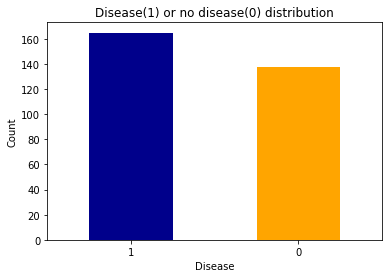

In [76]:
        #Let's plot the counts of 
        LABELS = ["1", "0"]
        count_classes = pd.value_counts(df['Disease'], sort = True)
        count_classes.plot(kind = 'bar',color=["Darkblue", "orange"], rot=0)
        plt.title("Disease(1) or no disease(0) distribution")
        plt.xticks(range(2), LABELS)
        plt.xlabel("Disease")
        plt.ylabel("Count");


In [52]:
#lets look at the target vrs female catigory
# Comparing target column with sex column
pd.crosstab(df.Disease, df.sex)

sex       0    1
Disease         
0        24  114
1        72   93

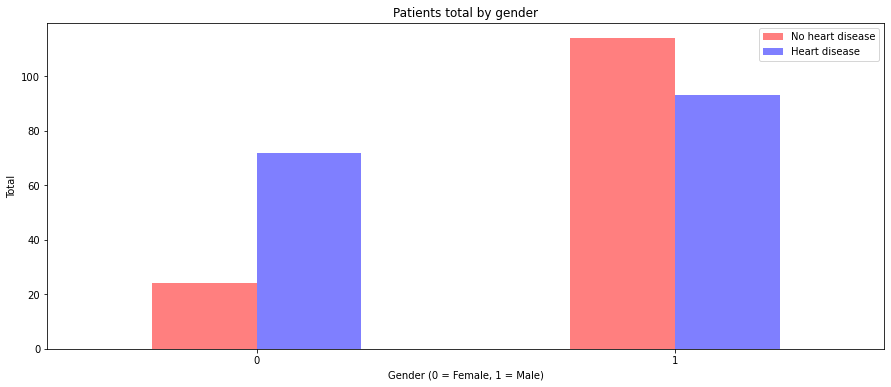

In [129]:
#What is the average age of the patients with the disease vrs not diseased?
#pd.crosstab(df.Disease, df.sex).plot(kind="bar", 
                                    #figsize=(10,6), 
                                   # color=["salmon", "lightblue"])
#plt.xticks(rotation=0); # for keeping the labels on the x-axis vertical

pd.crosstab(df.sex,df.Disease).plot(kind="bar",figsize=(15,6),color=['r','b' ],alpha = 0.5)
plt.title('Patients total by gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["No heart disease","Heart disease"])
plt.ylabel('Total')
plt.show()


In [28]:
#What is the mean age the patients
df.age.sort_values(ascending=False).mean()

54.366336633663366

In [50]:
#What is the age distribution of patience
df.age.sort_values(ascending=False)

238    77
144    76
129    74
151    71
60     71
       ..
65     35
239    35
125    34
58     34
72     29
Name: age, Length: 303, dtype: int64

Though average is 54. The olderst patient is 77 years old. 

In [53]:
df.set_index('sex').age.sort_values(ascending=False).tail()

sex
0    35
1    35
0    34
1    34
1    29
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

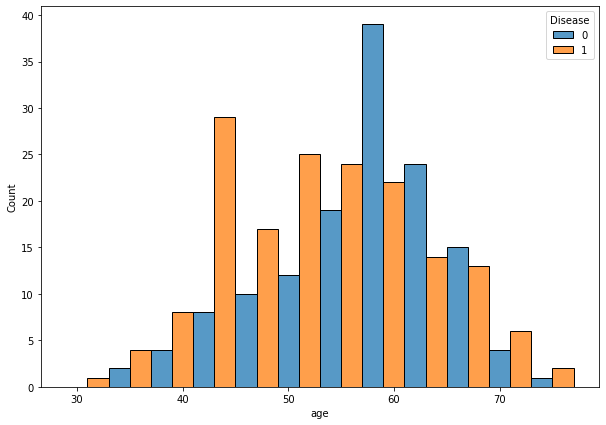

In [67]:
#show age distribution and risk to heart disease
plt.figure(figsize = [10,7])
sns.histplot(data = df, x = "age", hue = "Disease", multiple = "dodge")

<AxesSubplot:xlabel='cholesterol', ylabel='Count'>

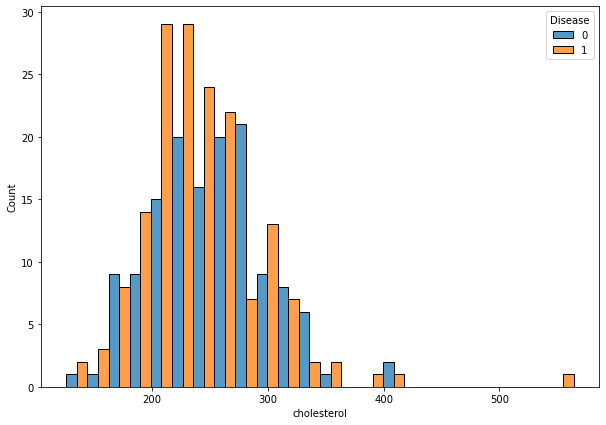

In [81]:
#How about Cholesterol
plt.figure(figsize = [10,7])
sns.histplot(data = df, x = "cholesterol", hue = "Disease", multiple = "dodge")

<AxesSubplot:>

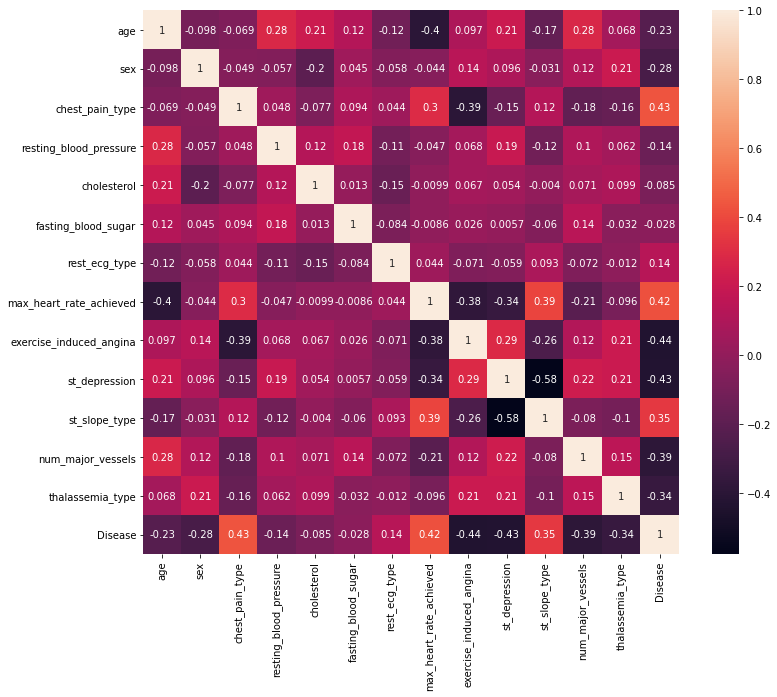

In [88]:
#Lets look at correlation among variables
#Lets generate a heatmap showing the relation among features
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)

There is positive correlation between chest pain and risk of heart disease. This sugges the greater amount of chest pain results in a greater chance of having heart disease
In addition, we see a negative correlation between Max heart rate achieved, st-Depression, number of major vessels and heart disease. Interestingly, though cholesterol negatively correlates being positive for the disease, the correlation is very weak.
There are a few predictors that show some correlation: Heart rate and chest pain, st-slope and heart rate. 

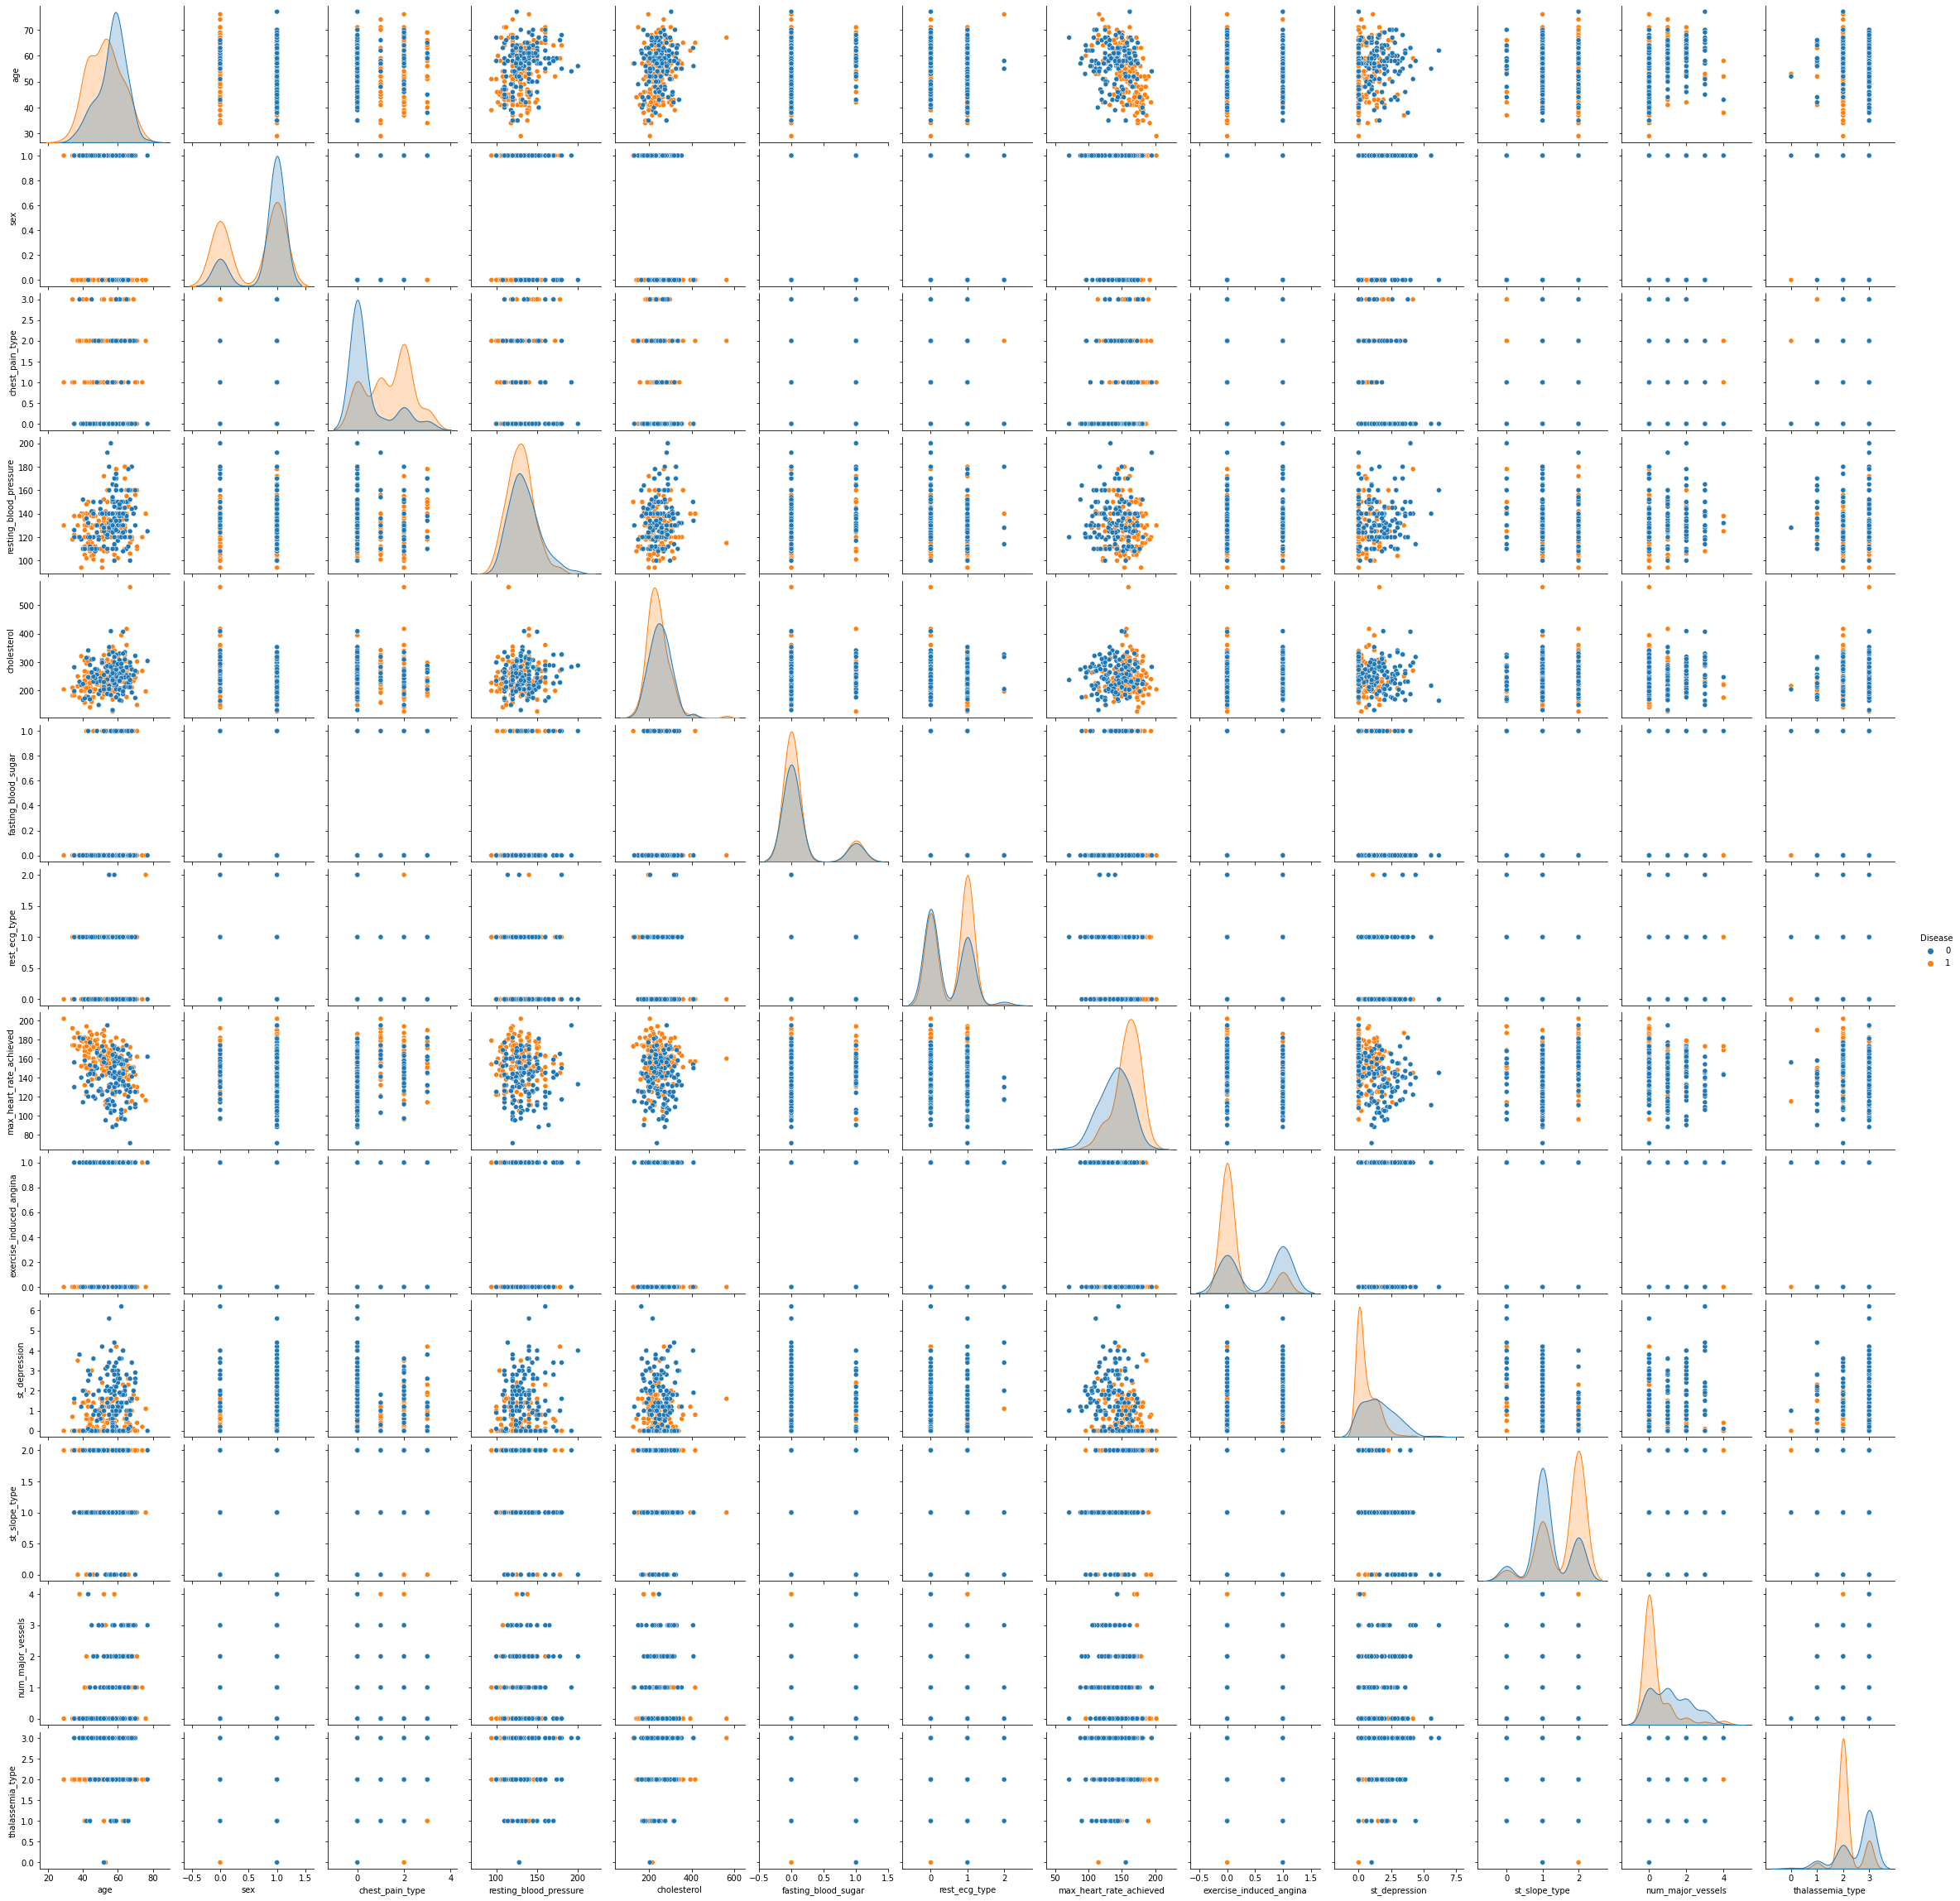

In [125]:
#Let's look at the pairwise correlations in a graphical format
sns.pairplot(df,hue='Disease')

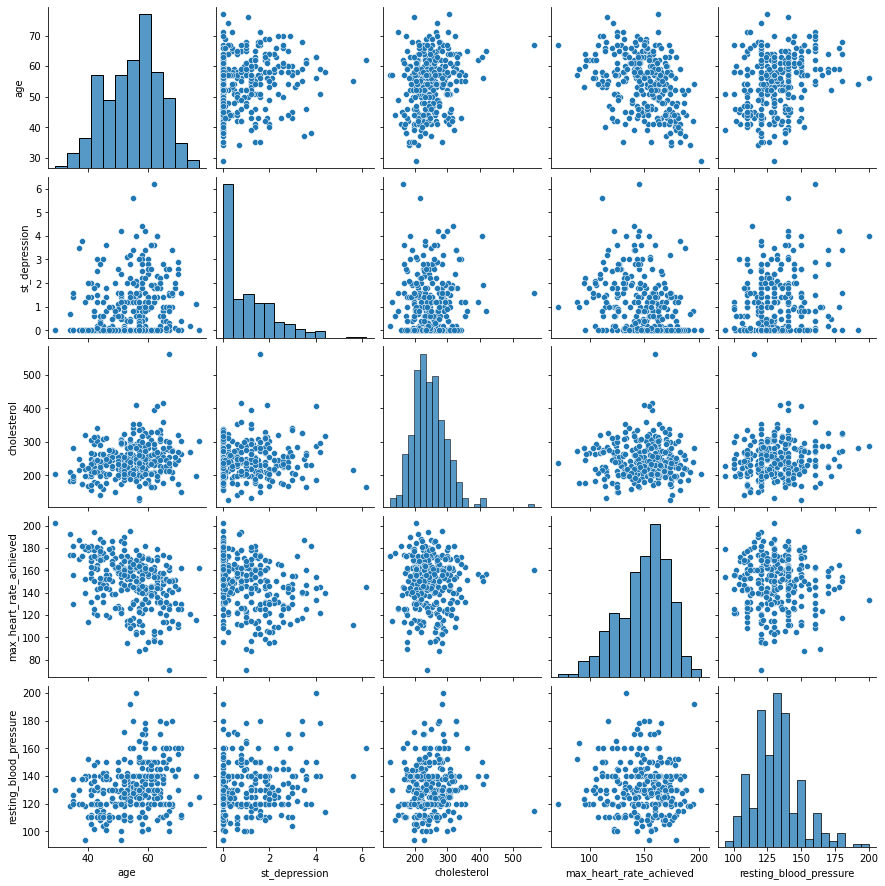

In [124]:
#Lets try only pairplot for the continous variables
subData = df[['age','st_depression','cholesterol','max_heart_rate_achieved','resting_blood_pressure']]
sns.pairplot(subData)

It is clear from the heatmap that there is weak correlation among variable and target's correlation with other variables is less than 50%.

Text(13.912083333333328, 0.5, 'St_depression')

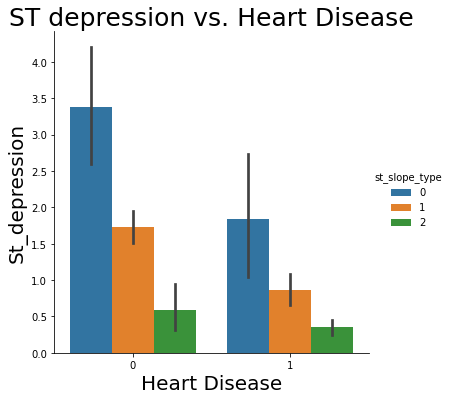

In [123]:
#If the trace in the ST segment is abnormally low below the baseline, this can lead to this Heart Disease.
#Lets check if the data supports this assumption
sns.catplot(x="Disease", y="st_depression", hue="st_slope_type", kind="bar", data=df);
plt.title('ST depression vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('St_depression',size=20)

# Feature engineering and pre-processing data for modelling

In [131]:
#Lets look at the data once more
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg_type            303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope_type            303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia_type         303 non-null    int64  
 13  Disease                  303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [132]:
#Lets check the data once more
df.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg_type  max_heart_rate_achieved  \
0                    1              0                      150   
1                    0              1                      187   
2                    0              0                      172   
3                    0              1                      178   
4                    0              1                      163   

   exercise_induced_angina  st_depression  st_slope_type  num_major_vessels  \
0                        0            2.3              0                  0   
1                        0            3.5              0                  0   
2                        0            1.4              2                  0   
3                        0            0.8              2                  0   
4                        1            0.6              2                  0   

   thalassemia_type  Disease  
0                 1        1  
1                 2        1  
2                 2        1  
3                 2        1  
4                 2        1

In [133]:
#Lets get dummies for catigorical features
#dummies = pd.get_dummies(df['chest_pain_type'])
dmy=pd.get_dummies(df['chest_pain_type'], prefix='chest_pain_type', drop_first=True)
dmy1=pd.get_dummies(df['fasting_blood_sugar'], prefix='fasting_blood_sugar', drop_first=True)
dmy2=pd.get_dummies(df['rest_ecg_type'], prefix='rest_ecg_type', drop_first=True)
dmy3=pd.get_dummies(df['st_slope_type'], prefix='st_slope_type', drop_first=True)
dmy4=pd.get_dummies(df['thalassemia_type'], prefix='thalassemia_type', drop_first=True)
dmy5=pd.get_dummies(df['exercise_induced_angina'], prefix='thalassemia_type', drop_first=True)

# add dummy variables to df_ dataframe, 
dummies= pd.concat([dmy, dmy1, dmy2, dmy3, dmy4, dmy5], axis=1)

In [134]:
df_2= pd.concat([df, dummies], axis=1)

In [135]:
df_2.head()

age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   63    1                3                     145          233   
1   37    1                2                     130          250   
2   41    0                1                     130          204   
3   56    1                1                     120          236   
4   57    0                0                     120          354   

   fasting_blood_sugar  rest_ecg_type  max_heart_rate_achieved  \
0                    1              0                      150   
1                    0              1                      187   
2                    0              0                      172   
3                    0              1                      178   
4                    0              1                      163   

   exercise_induced_angina  st_depression  ...  chest_pain_type_3  \
0                        0            2.3  ...                  1   
1                        0            3.5  ...                  0   
2                        0            1.4  ...                  0   
3                        0            0.8  ...                  0   
4                        1            0.6  ...                  0   

   fasting_blood_sugar_1  rest_ecg_type_1  rest_ecg_type_2  st_slope_type_1  \
0                      1                0                0                0   
1                      0                1                0                0   
2                      0                0                0                0   
3                      0                1                0                0   
4                      0                1                0                0   

   st_slope_type_2  thalassemia_type_1  thalassemia_type_2  \
0                0                   1                   0   
1                0                   0                   1   
2                1                   0                   1   
3                1                   0                   1   
4                1                   0                   1   

   thalassemia_type_3  thalassemia_type_1  
0                   0                   0  
1                   0                   0  
2                   0                   0  
3                   0                   0  
4                   0                   1  

[5 rows x 26 columns]

In [136]:
df_2.shape

(303, 26)

Lets drop the catigorical variables with dummies

In [137]:
df_2.drop(columns=['chest_pain_type','fasting_blood_sugar','rest_ecg_type','st_slope_type', 'exercise_induced_angina','thalassemia_type'],axis=1,inplace=True)
df_2.shape

(303, 20)

In [138]:
df_2.head()

age  sex  resting_blood_pressure  cholesterol  max_heart_rate_achieved  \
0   63    1                     145          233                      150   
1   37    1                     130          250                      187   
2   41    0                     130          204                      172   
3   56    1                     120          236                      178   
4   57    0                     120          354                      163   

   st_depression  num_major_vessels  Disease  chest_pain_type_1  \
0            2.3                  0        1                  0   
1            3.5                  0        1                  0   
2            1.4                  0        1                  1   
3            0.8                  0        1                  1   
4            0.6                  0        1                  0   

   chest_pain_type_2  chest_pain_type_3  fasting_blood_sugar_1  \
0                  0                  1                      1   
1                  1                  0                      0   
2                  0                  0                      0   
3                  0                  0                      0   
4                  0                  0                      0   

   rest_ecg_type_1  rest_ecg_type_2  st_slope_type_1  st_slope_type_2  \
0                0                0                0                0   
1                1                0                0                0   
2                0                0                0                1   
3                1                0                0                1   
4                1                0                0                1   

   thalassemia_type_1  thalassemia_type_2  thalassemia_type_3  \
0                   1                   0                   0   
1                   0                   1                   0   
2                   0                   1                   0   
3                   0                   1                   0   
4                   0                   1                   0   

   thalassemia_type_1  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1

#Data looks clean and will be ready for model training. 

# Feature selection

In [160]:
#Which features are the best for building our model?
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df_2.drop(['Disease'],axis =1)
y = df_2['Disease']
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(30,'Score')) 

                      Specs       Score
4   max_heart_rate_achieved  188.320472
5             st_depression   72.644253
6         num_major_vessels   66.440765
17       thalassemia_type_3   43.952735
18       thalassemia_type_1   38.914377
16       thalassemia_type_2   38.097052
14          st_slope_type_2   25.001417
3               cholesterol   23.936394
0                       age   23.286624
8         chest_pain_type_2   21.670328
13          st_slope_type_1   21.366462
7         chest_pain_type_1   15.295502
2    resting_blood_pressure   14.823925
1                       sex    7.576835
11          rest_ecg_type_1    4.641398
15       thalassemia_type_1    3.237945
9         chest_pain_type_3    2.117219
12          rest_ecg_type_2    1.399308
10    fasting_blood_sugar_1    0.202934


In [141]:
#Lets split the data into traini and test. Lets see which proportion is better
X = df_2.drop("Disease", axis=1)
y = df_2["Disease"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.25)

In [153]:
#lets normalize the data. This is importiant because the data has continous variables that are not in same range 1-3, 
#while others like heart rate etc are 100 and above. 
#This will make the variables with higher range have higher impact, which may affect the model accuracy
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
lm = LogisticRegression(solver='liblinear')
lm.fit(X_train,y_train)
accuracy_train = lm.score(X_train, y_train)
print('Accuracy for Training :',str(round(accuracy_train*100,2))+' Percentage')

Accuracy for Training : 85.02 Percentage


In [155]:
#Cross-validation
y_pred = lm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for Testing :',str(round(accuracy*100,2))+' Percentage')

Accuracy for Testing : 87.5 Percentage


In [156]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.875

In [158]:
#Let us test if scaling the data impoved the model performance
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(30,'Score'))
plt.his

                      Specs      Score
17       thalassemia_type_3  42.753458
18       thalassemia_type_1  36.009971
16       thalassemia_type_2  35.502251
14          st_slope_type_2  23.055676
8         chest_pain_type_2  22.431505
13          st_slope_type_1  20.375673
6         num_major_vessels  14.620643
7         chest_pain_type_1  14.342018
5             st_depression  10.692005
1                       sex   6.914033
11          rest_ecg_type_1   4.768099
4   max_heart_rate_achieved   2.585509
15       thalassemia_type_1   1.755144
9         chest_pain_type_3   1.354953
0                       age   1.143437
12          rest_ecg_type_2   0.516194
2    resting_blood_pressure   0.390376
3               cholesterol   0.111519
10    fasting_blood_sugar_1   0.004656


#As anticipated the impact of max_heart_rate_achieved was huge when the data was not scaled. But after 

# Test multiple splits to avoid overfitting

In [161]:
for size in [.80, 0.60,0.50, 0.4, 0.3,0.25,0.2,0.15,0.1,0.05]:
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=size)
    lm.fit(X_train, y_train)
    y_predict = lm.predict(X_test)
    print(size, accuracy_score(y_test,y_predict))

0.8 0.7942386831275721
0.6 0.8406593406593407
0.5 0.8289473684210527
0.4 0.8442622950819673
0.3 0.8571428571428571
0.25 0.9078947368421053
0.2 0.8688524590163934
0.15 0.8043478260869565
0.1 0.8709677419354839
0.05 0.875


75:25 split gave the best score for our LogisticRegression. 

# Models

In [168]:
#Lets Build some models and compare them at the end
lm = LogisticRegression(solver='liblinear')
svm = SVC()
knn= KNeighborsClassifier(n_neighbors=5)
rf1 = RandomForestClassifier(n_estimators=100)

# Logistic model

In [169]:
lm.fit(X_train,y_train)
accuracy_train = lm.score(X_train, y_train)
print('Accuracy for Training :',str(round(accuracy_train*100,2))+' Percentage')

y_pred = lm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for Testing :',str(round(accuracy*100,2))+' Percentage')

Accuracy for Training : 86.41 Percentage
Accuracy for Testing : 87.5 Percentage


# Support Vector Classifier

In [170]:
svm.fit(X_train,y_train)
accuracy_train = svm.score(X_train, y_train)
print('Accuracy for Training :',str(round(accuracy_train*100,2))+' Percentage')
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for Testing :',str(round(accuracy*100,2))+' Percentage')

Accuracy for Training : 67.25 Percentage
Accuracy for Testing : 56.25 Percentage


# Random forest classifier

In [181]:
rf1.fit(X_train,y_train)
accuracy_train = rf1.score(X_train, y_train)
print('Accuracy for Training :',str(round(accuracy_train*100,2))+' Percentage')
y_pred = rf1.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for Testing :',str(round(accuracy*100,2))+' Percentage')

Accuracy for Training : 100.0 Percentage
Accuracy for Testing : 81.25 Percentage


In [ ]:
#Random forest is overfitting.

# K-Neighbors Classifier¶

In [172]:
knn.fit(X_train,y_train)
accuracy_train = knn.score(X_train, y_train)
print('Accuracy for Training :',str(round(accuracy_train*100,2))+' Percentage')

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy for Testing :',str(round(accuracy*100,2))+' Percentage')

Accuracy for Training : 77.35 Percentage
Accuracy for Testing : 62.5 Percentage


In [187]:
model = ['LogisticRegression','RandomForestClassifier','KNeighborsClassifier','SVC']
accuracy = [87.5, 81.25,62.5, 56.25]

In [188]:
pd.DataFrame({'Name':model,'Accuracy':accuracy})

Name  Accuracy
0      LogisticRegression     87.50
1  RandomForestClassifier     81.25
2    KNeighborsClassifier     62.50
3                     SVC     56.25

Random forest may be overfitting. Lets perform some parameter tuning and determine the best n_estimators

In [173]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf1 = RandomForestClassifier(random_state=6)
param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [5, 15, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 5]}
grid = GridSearchCV(rf1, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
y_pred_rf1 = grid.predict(X_test)
print(grid.score(X_test, y_test))

0.8125


In [175]:
grid.best_score_

0.8188230994152047

In [176]:
grid.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=500,
                       random_state=6)

In [177]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50         7
           1       0.64      0.78      0.70         9

    accuracy                           0.62        16
   macro avg       0.62      0.60      0.60        16
weighted avg       0.62      0.62      0.61        16



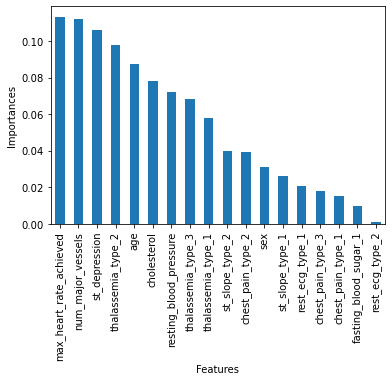

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

forest = RandomForestClassifier(n_estimators=500,
                                max_features = 'sqrt',
                               class_weight = 'balanced')

forest.fit(scaler.fit_transform(X), y)

importances = forest.feature_importances_

importances_df1 = pd.DataFrame.from_dict(dict(zip(X.columns, importances)), orient='index', columns = ["importances"])

importances_df1.sort_values("importances", ascending = False).plot(kind = 'bar', legend = None)
plt.xlabel('Features')
plt.ylabel('Importances')
plt.show()

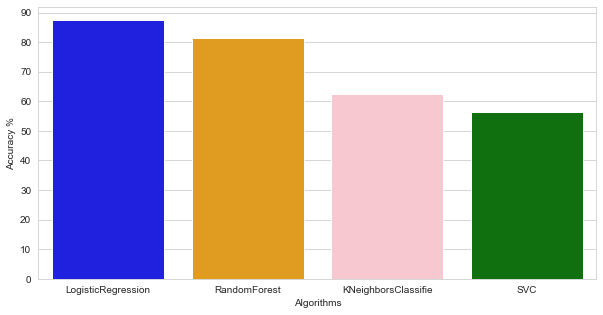

In [194]:
methods = ["LogisticRegression", "RandomForest", "KNeighborsClassifie", "SVC"]
accuracy = [87.50,81.25,62.50,56.25]
colors = ["blue", "orange", "pink", "green"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()